In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Hierachical clustering
<img src="Images/14_1_HC_1.JPG" height="300">
- There are 2 types of HC Clustering:
    - Agglomerative (focus on this)
    - Divisive
#### Agglomerative HC
<img src="Images/14_1_HC_2.JPG" height="300">
- How can we define closest clusters? 

#### Some kinds of Distance
<img src="Images/14_2_Euclidean.JPG" height="300">
<img src="Images/14_3_Distance.JPG" height="300">
- The problem of HC is to choose which distance to be chosen. It will affect your result much.
- Distance between 2 clusters is different from between 2 points. However, it would be defined by the distance between 2 points based on some options above.

- Dataset with N=6 points
<img src="Images/14_4_Step_1.JPG" height="300">
<img src="Images/14_4_Step_2.JPG" height="300">
<img src="Images/14_4_step_3.JPG" height="300">
<img src="Images/14_4_step_4.JPG" height="300">
... and repeat until we have only 1 cluster
<img src="Images/14_4_Step_3_4.JPG" height="300">

- What is the purpose of this algorithm? The way HC works is that it mantains the memory of how we go to this process. The memory has a dendograms.

#### How Do Dendograms work?
- Use the chart on the left to create a dendogram on the right:
<img src="Images/14_5_dendogram_1.JPG" height="300">
- Follow the steps above for the left hand side:
    - Step 2: P2, P3 into 1 cluster, the y axis of the dendogram is the Eucledian distance between 2 points that are formed into 1 cluster: (The distance represents the dissimilarity between the 2 points (or 2 people in a dataset for example)). The greater the distance, the greater the dissimilarity.
    <img src="Images/14_5_dendogram_2.JPG" height="300">
    - Step 3: The same but with P5, P6 
    <img src="Images/14_5_dendogram_3.JPG" height="300">
    - Step 4: 
    <img src="Images/14_5_dendogram_4.JPG" height="300">
    -... and finally we have:
    <img src="Images/14_5_dendogram_5.JPG" height="300">
    
#### How to use dendrograms?
- Depends on the number of clusters we want to separate the dataset.
- First we have to set up a Threshold in the Euclidean distance. If the distance is above this threshold, we reject that layer (hierarchical), it means we don't want any clusters having a dissimilarity at that threshold distance.
- For example, we want 2 clusters:
<img src="Images/14_6_threshold.JPG" height="300">
- What the dendrogram can tell us is that, within the 2 clusters, there are no distance above the threshold
- Actually, using the dendrogram, we can tell how many clusters to be decided by counting how many points the threshold cross the veritcal lines, i.e. 2 in the above figure.
- Now assume that we want 4 clusters:
<img src="Images/14_6_threshold_2.JPG" height="300">
- It works the same for the 6 cluster case.

#### Optimal number of clusters using Dendrograms
- Look for the highest distance (vertical lines) in the dendrogram. 
- Look for the vertical lines that are not Crossed by any horizontal line. In the above figure, P1's vertical line is crossed by P2, P3 connection line, and same for P4, which is crossed by P5, P6 connection line.
- Find the longest line that isn't crossed by any horizontal line. 
- The *recommended* number is a threshold that crosses that longest line.

- Consider the following example, the longest line is the line that is NOT crossed by any horizontal line, so:
<img src="Images/14_6_example.JPG" height="300">
- That's why we have 3 clusters:
<img src="Images/14_6_example_2.JPG" height="300">

### Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Mall_Customers.csv")

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = dataset.iloc[:, 3:].values

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

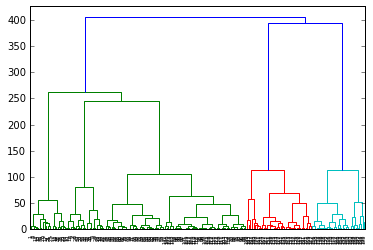

In [13]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [14]:
# As in the above figure, we see that the lognest is the part of the Blue 
# line between the green and red horizontal lines
# So we choose the number of clusters to be 5


In [21]:
# Fit the HC
from sklearn.cluster.hierarchical import AgglomerativeClustering
classifier = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                    linkage='ward')

In [22]:
y_pred = classifier.fit_predict(X)

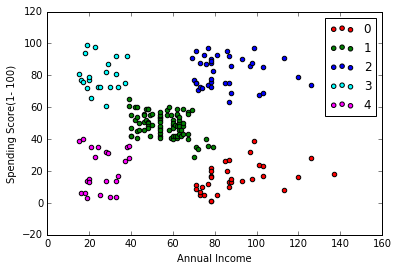

In [29]:
color = ['red', 'green', 'blue', 'cyan', 'magenta']
for i in range(0, 5):
    plt.scatter(X[y_pred==i, 0], X[y_pred==i, 1], c=color[i],
               label=i)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1- 100)")
plt.legend()

#### Understanding the result (Analyze)
- Group 0: (red) They have high income, and come often to the mall, but they don't spend much money in the Mall.
- Group 1: (green) in the middle, average income, average spending
- Group 2: (blue) High income, high spending score
- Group 3: (cyan) Low income, but high spending score
- Group 4: (magenta) Low income, low spending score.